## Handwritten Digit Classification

This is an analysis of handwritten digits from MNIST dataset to classify them between 0 and 9. A simple tensorflow neural network is used to do this task.

In [1]:
import tensorflow as tf

# Loading the MNSIT dataset 
mnist = tf.keras.datasets.mnist

### Loading the data

In [2]:
# Loading the data into train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The data is stored as a black and white image of handwritten digit. The following shows a sample.

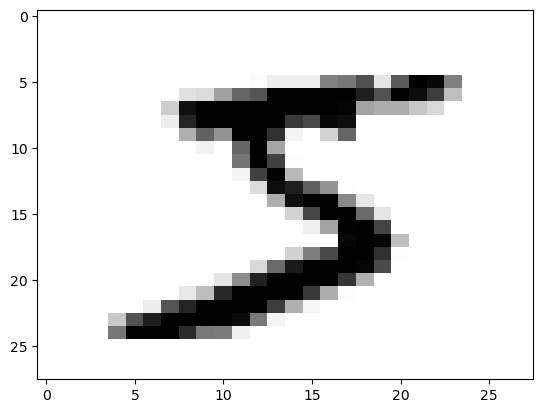

In [3]:
import matplotlib.pyplot as plt

# Showing the image as a graph
plt.imshow(X_train[0], cmap = plt.cm.binary, aspect='auto')
plt.show()

The data is pre-processed by normalizing the data.

In [4]:
# The data is normalized to values between 0 and 1 for better results

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

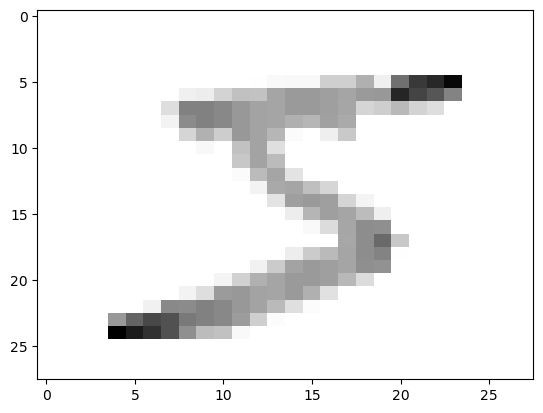

In [5]:
# We plot the same number again to see the difference

plt.imshow(X_train[0], cmap = plt.cm.binary, aspect='auto')
plt.show()

### Model creation and training

In [6]:
# Defining a simple neural network

model = tf.keras.models.Sequential()
# Input layer 
# Size of each image is 28*28. Therefore, the input size should be (28,28)
model.add(tf.keras.layers.Flatten())

# First hidden layer with 128 hidden units and RELU activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Second hidden layer with 128 hidden units and RELU activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Output layer with 10 units corresponding to 10 digits for classification
# Softmax activation function to find the class to be predicted
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [7]:
# Compiling the model with optimizer and loss function

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
# Training the model

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8707 - loss: 0.4724 - val_accuracy: 0.9563 - val_loss: 0.1337
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9646 - loss: 0.1158 - val_accuracy: 0.9639 - val_loss: 0.1143
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9772 - loss: 0.0717 - val_accuracy: 0.9713 - val_loss: 0.0982
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0527 - val_accuracy: 0.9694 - val_loss: 0.0961
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0370 - val_accuracy: 0.9721 - val_loss: 0.1006
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9899 - loss: 0.0294 - val_accuracy: 0.9768 - val_loss: 0.0872
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9764 - val_loss: 0.0840
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0190 - 

### Results

The following plot is the visualization between the cost and number of epochs. It consists of training and test loss. The loss corresponds to the performance during training and validation loss corresponds to the performance during validation.

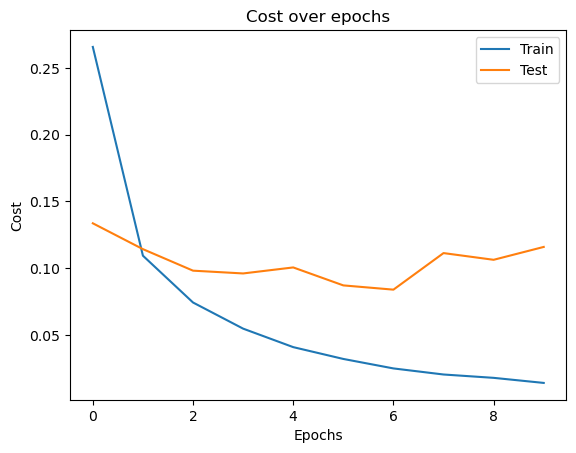

In [9]:
# Plot between the training loss, validation loss and number of epochs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cost over epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend(['Train', 'Test'], loc='upper right')

The following plot is the visualization between the training and test accuracy over number of epochs

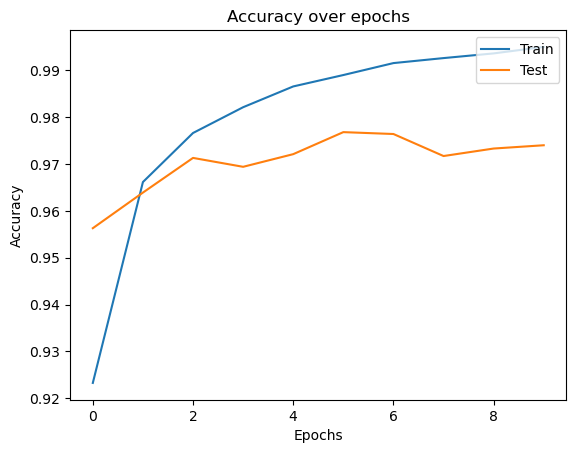

In [10]:
# Plot between training accuracy, test accuracy over epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')